In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

[1.31]
2.041751698909542
[5.01658392422074]


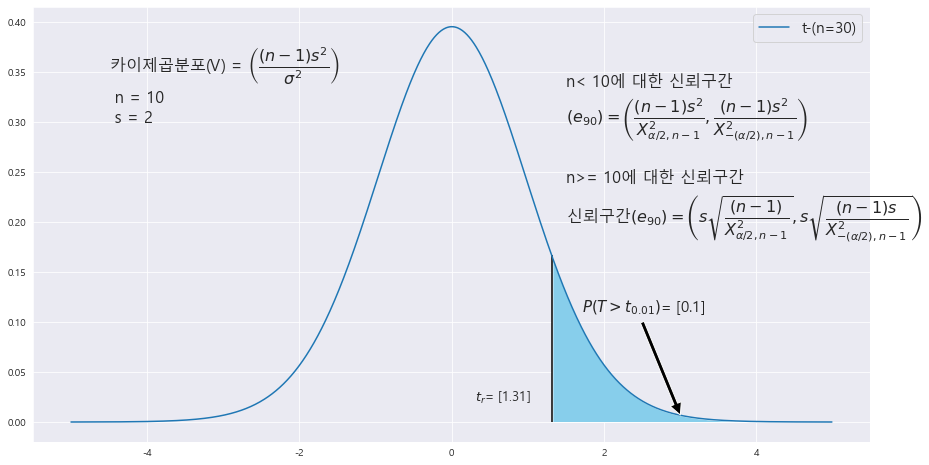

In [38]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))
dof_2 = [30] #자유도

trust = 90
trust = round(1- trust/100,3)

n = 10
s = 2
ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
t_r =  scipy.stats.t(dof_2).ppf(1-trust)
# t_r = round( (x_0 - (0)) / (math.sqrt(33.463) * math.sqrt(1/16 + 1/16)), 3)
print(t_r)


ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')

plt.annotate('' , xy=(3.0, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))

area = 1- scipy.stats.t(dof_2).cdf(t_r)
ax.text(1.71 , .11, r'$P(T>t_{0.01})$' + f'= {area}',fontsize=15)

ax.text(1.5 , 0.3 , f'n< 10에 대한 신뢰구간\n' + r'$(e_{%d})= \left(\dfrac{(n-1)s^{2}}{X^2_{\alpha/2 , n-1}} ,\dfrac{(n-1)s^{2}}{X^2_{-(\alpha/2) , n-1}} \right)$' % ((1- trust)*100)  , fontsize = 16)

ax.text(1.5 , 0.2 ,f'n>= 10에 대한 신뢰구간\n' +  r'신뢰구간$(e_{%d}) = \left(s\sqrt{\dfrac{(n-1)}{X^2_{\alpha/2 , n-1}}} ,s\sqrt{\dfrac{(n-1)s}{X^2_{-(\alpha/2) , n-1}}} \right)$' % ((1- trust)*100) , fontsize = 16)


ax.text(-4.5 , 0.3 , r'카이제곱분포(V) = $\left(\dfrac{(n-1)s^{2}}{\sigma^{2}}\right)$' + f'\n n = {n}\n s = {s}' , fontsize = 16)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)


b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


t = Symbol('t')

a = solve( t-  2.457 * (math.sqrt(33.35)* math.sqrt(1/16 + 1/16)))

print((math.sqrt(33.35)* math.sqrt(1/16 + 1/16)))
print(a)